In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
##See what the two tables consist of 
inspector = inspect(engine)
inspector.get_table_names()
measure_ins = inspector.get_columns('measurement')
for c in measure_ins:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
station_ins = inspector.get_columns('station')
for c in station_ins:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
#We call the query and set the index to the date then specify the last 12 months in Pandas
measure_mod = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').filter(Measurement.date >='2016-08-23').order_by(Measurement.date).all()
df_measurement = pd.DataFrame(measure_mod)
dfm = df_measurement.set_index('date')
# dfm = df_measurement.sort_index(axis=1)
value_twelve_months = dfm[(dfm !=0).all(1)]
clean_twelve_months = value_twelve_months.dropna()
clean_twelve_months

,prcp
date,
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22


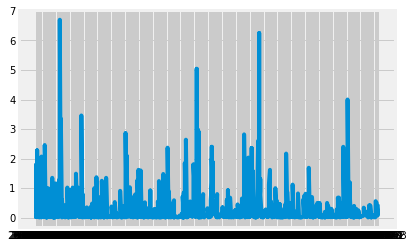

In [40]:
#now we can plot the data in matplot
from numpy import array
plt.plot(clean_twelve_months)

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
clean_twelve_months.describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


In [42]:
# Design a query to show how many stations are available in this dataset?
station_query = session.query(Station)
print(f'Total number of stations are {station_query.count()}.')

Total number of stations are 9.


In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active = station[0][0]
active_stat = station[0][1]
least = station[8][0]
least_active = station[8][1]
print(f"{active} has {active_stat} which is the most active and {least} has {least_active} is the least active.")

USC00519281 has 2772 which is the most active and USC00518838 has 511 is the least active.


In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).all()
active_station = temp[-3]
active_station

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [51]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.date, Measurement.station,Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date <= '2017-08-23').filter(Measurement.date >='2016-08-18').all()
df_temperature = pd.DataFrame(temperature)
df_temperature

,date,station,tobs
0,2016-08-18,USC00519281,80.0
1,2016-08-19,USC00519281,79.0
2,2016-08-20,USC00519281,81.0
3,2016-08-21,USC00519281,79.0
4,2016-08-22,USC00519281,78.0
5,2016-08-23,USC00519281,77.0
6,2016-08-24,USC00519281,77.0
7,2016-08-25,USC00519281,80.0
8,2016-08-26,USC00519281,80.0
9,2016-08-27,USC00519281,75.0


(array([ 6., 10., 15., 27., 41., 58., 72., 87., 32.,  9.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <a list of 10 Patch objects>)

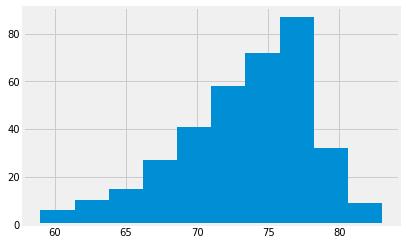

In [53]:
plt.hist(df_temperature.tobs)

![precipitation](Images/station-histogram.png)

In [54]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [55]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-08-18','2017-08-23' )

[(58.0, 74.63865546218487, 87.0)]

In [57]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar(calc_temps('2016-08-18','2017-08-23', yerr = #error shouldl behere.. ))

SyntaxError: unexpected EOF while parsing (<ipython-input-57-f6f1feb3e8a4>, line 5)

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
